<a href="https://colab.research.google.com/github/VKhusainov/Netology/blob/main/%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%BA%D1%83%D1%80%D1%81%D1%83_%22Python_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22_%D0%A5%D1%83%D1%81%D0%B0%D0%B8%D0%BD%D0%BE%D0%B2%D0%92%D0%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [23]:
#загружаем файл
df = pd.read_csv('/content/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
df.duplicated().sum()

3008

In [26]:
# Удаляем дубликаты
df = df.drop_duplicates()

# Проверяем размер набора данных после удаления дубликатов
df.shape

(11991, 10)

Задание 2:

Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [28]:
# Переименовать столбцы на русский язык
df_renamed = df.rename(columns={
    'satisfaction_level': 'Уровень_удовлетворенности',
    'last_evaluation': 'Последняя_оценка',
    'number_project': 'Количество_проектов',
    'average_montly_hours': 'Среднемесячные_часы',
    'time_spend_company': 'Стаж_работы',
    'Work_accident': 'Несчастные_случаи',
    'left': 'Уволился',
    'promotion_last_5years': 'Повышение_за_5_лет',
    'department': 'Отдел',
    'salary': 'Зарплата'
})

# Отобразить первые несколько строк переименованного DataFrame
df_renamed.head()

,Уровень_удовлетворенности,Последняя_оценка,Количество_проектов,Среднемесячные_часы,Стаж_работы,Несчастные_случаи,Уволился,Повышение_за_5_лет,Отдел,Зарплата
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [29]:
#посмотрим основные статистики
df_renamed.describe()

,Уровень_удовлетворенности,Последняя_оценка,Количество_проектов,Среднемесячные_часы,Стаж_работы,Несчастные_случаи,Уволился,Повышение_за_5_лет
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [30]:
# Рассчитать основные статистики для количественных переменных
statistics = df_renamed.describe(include='all').transpose()

# Переименовать столбцы для удобства дальнейшего перевода
statistics.rename(columns={
    'mean': 'Среднее',
    '50%': 'Медиана',
    'min': 'Минимальное',
    'max': 'Максимальное',
    'std': 'Стандартное отклонение'
}, inplace=True)

# Добавить моду в DataFrame статистики
statistics['Мода'] = df_renamed.mode().iloc[0]

# Отобразить статистики
statistics[['Среднее', 'Медиана', 'Мода', 'Минимальное', 'Максимальное', 'Стандартное отклонение']]

,Среднее,Медиана,Мода,Минимальное,Максимальное,Стандартное отклонение
Уровень_удовлетворенности,0.629658,0.66,0.74,0.09,1.0,0.24107
Последняя_оценка,0.716683,0.72,0.55,0.36,1.0,0.168343
Количество_проектов,3.802852,4.0,4.0,2.0,7.0,1.163238
Среднемесячные_часы,200.473522,200.0,149,96.0,310.0,48.727813
Стаж_работы,3.364857,3.0,3.0,2.0,10.0,1.33024
Несчастные_случаи,0.154282,0.0,0.0,0.0,1.0,0.361234
Уволился,0.166041,0.0,0.0,0.0,1.0,0.372133
Повышение_за_5_лет,0.016929,0.0,0.0,0.0,1.0,0.129012
Отдел,NaN,NaN,sales,NaN,NaN,NaN
Зарплата,NaN,NaN,low,NaN,NaN,NaN


3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.


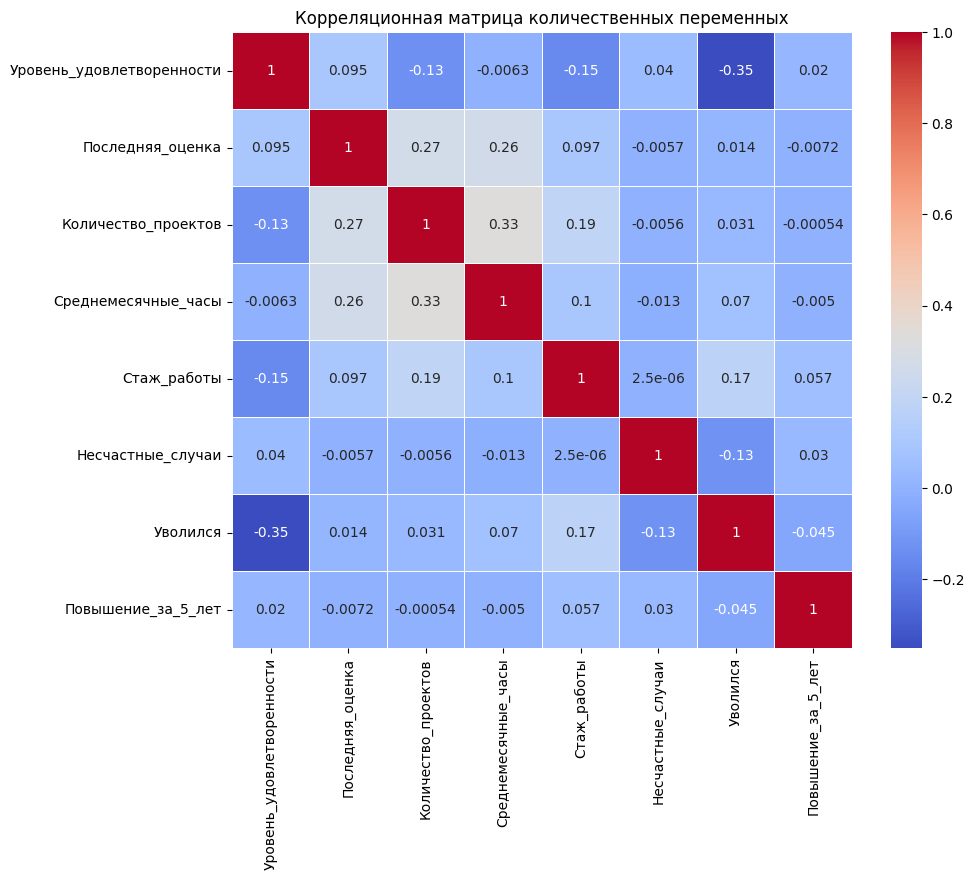

In [31]:
# Рассчитать корреляционную матрицу для количественных переменных
correlation_matrix = df_renamed.select_dtypes(include=['float64', 'int64']).corr()

# Визуализировать корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица количественных переменных')
plt.show()


In [32]:
# Сформировать скоррелированные пары переменных и отсортировать по модулю значения
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", key=abs)
# Исключить самокорреляции равные 1 и удалить дупликаты
correlation_pairs = correlation_pairs[correlation_pairs != 1].drop_duplicates()

# Найти две самые скоррелированные пары переменных по модулю корреляции
most_correlated = correlation_pairs[correlation_pairs.abs().nlargest(2).index]
# Найти две наименее скоррелированные пары переменных по модулю корреляции
least_correlated = correlation_pairs[correlation_pairs.abs().nsmallest(2).index]

print("\nДве самые скоррелированные пары переменных:")
print(most_correlated)

print("\nДве наименее скоррелированные пары переменных:")
print(least_correlated)


Две самые скоррелированные пары переменных:
Уволился             Уровень_удовлетворенности   -0.350558
Количество_проектов  Среднемесячные_часы          0.331516
dtype: float64

Две наименее скоррелированные пары переменных:
Несчастные_случаи   Стаж_работы            0.000003
Повышение_за_5_лет  Количество_проектов   -0.000544
dtype: float64


4. Рассчитайте сколько сотрудников работает в каждом
департаменте

In [33]:
# Подсчитать количество сотрудников в каждом департаменте
department_counts = df_renamed['Отдел'].value_counts()
print(department_counts)

Отдел
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64


<ipython-input-34-4c7e106905e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=department_counts.index, x=department_counts.values, palette='viridis')


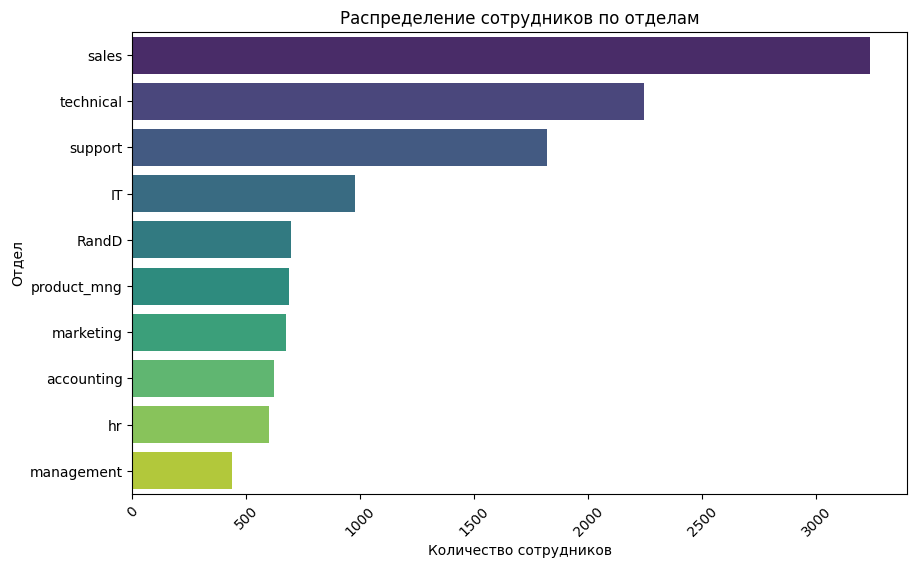

In [34]:
# Визуализировать распределение сотрудников по отделам
plt.figure(figsize=(10, 6))
sns.barplot(y=department_counts.index, x=department_counts.values, palette='viridis')
plt.title('Распределение сотрудников по отделам')
plt.ylabel('Отдел')
plt.xlabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.show()

5. Показать распределение сотрудников по зарплатам.

<ipython-input-35-cab4485ef004>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Зарплата', data=df_renamed, order=df_renamed['Зарплата'].value_counts().index, palette='viridis')


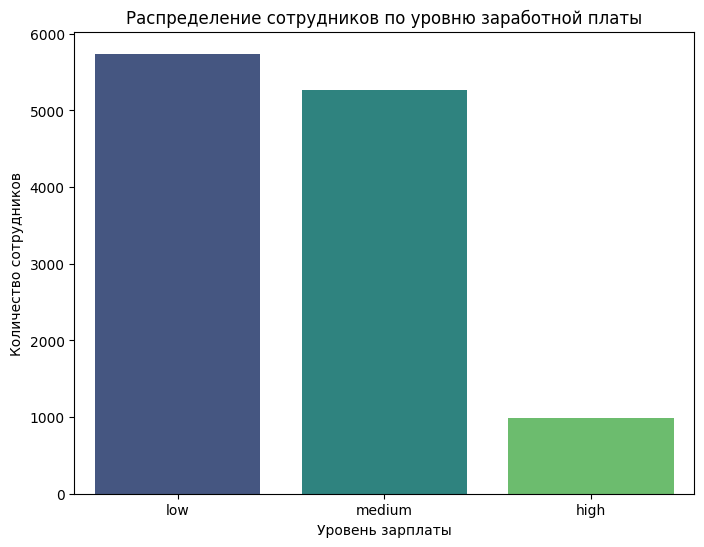

In [35]:
# Визуализировать распределение сотрудников по зарплатам
plt.figure(figsize=(8, 6))
sns.countplot(x='Зарплата', data=df_renamed, order=df_renamed['Зарплата'].value_counts().index, palette='viridis')
plt.title('Распределение сотрудников по уровню заработной платы')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

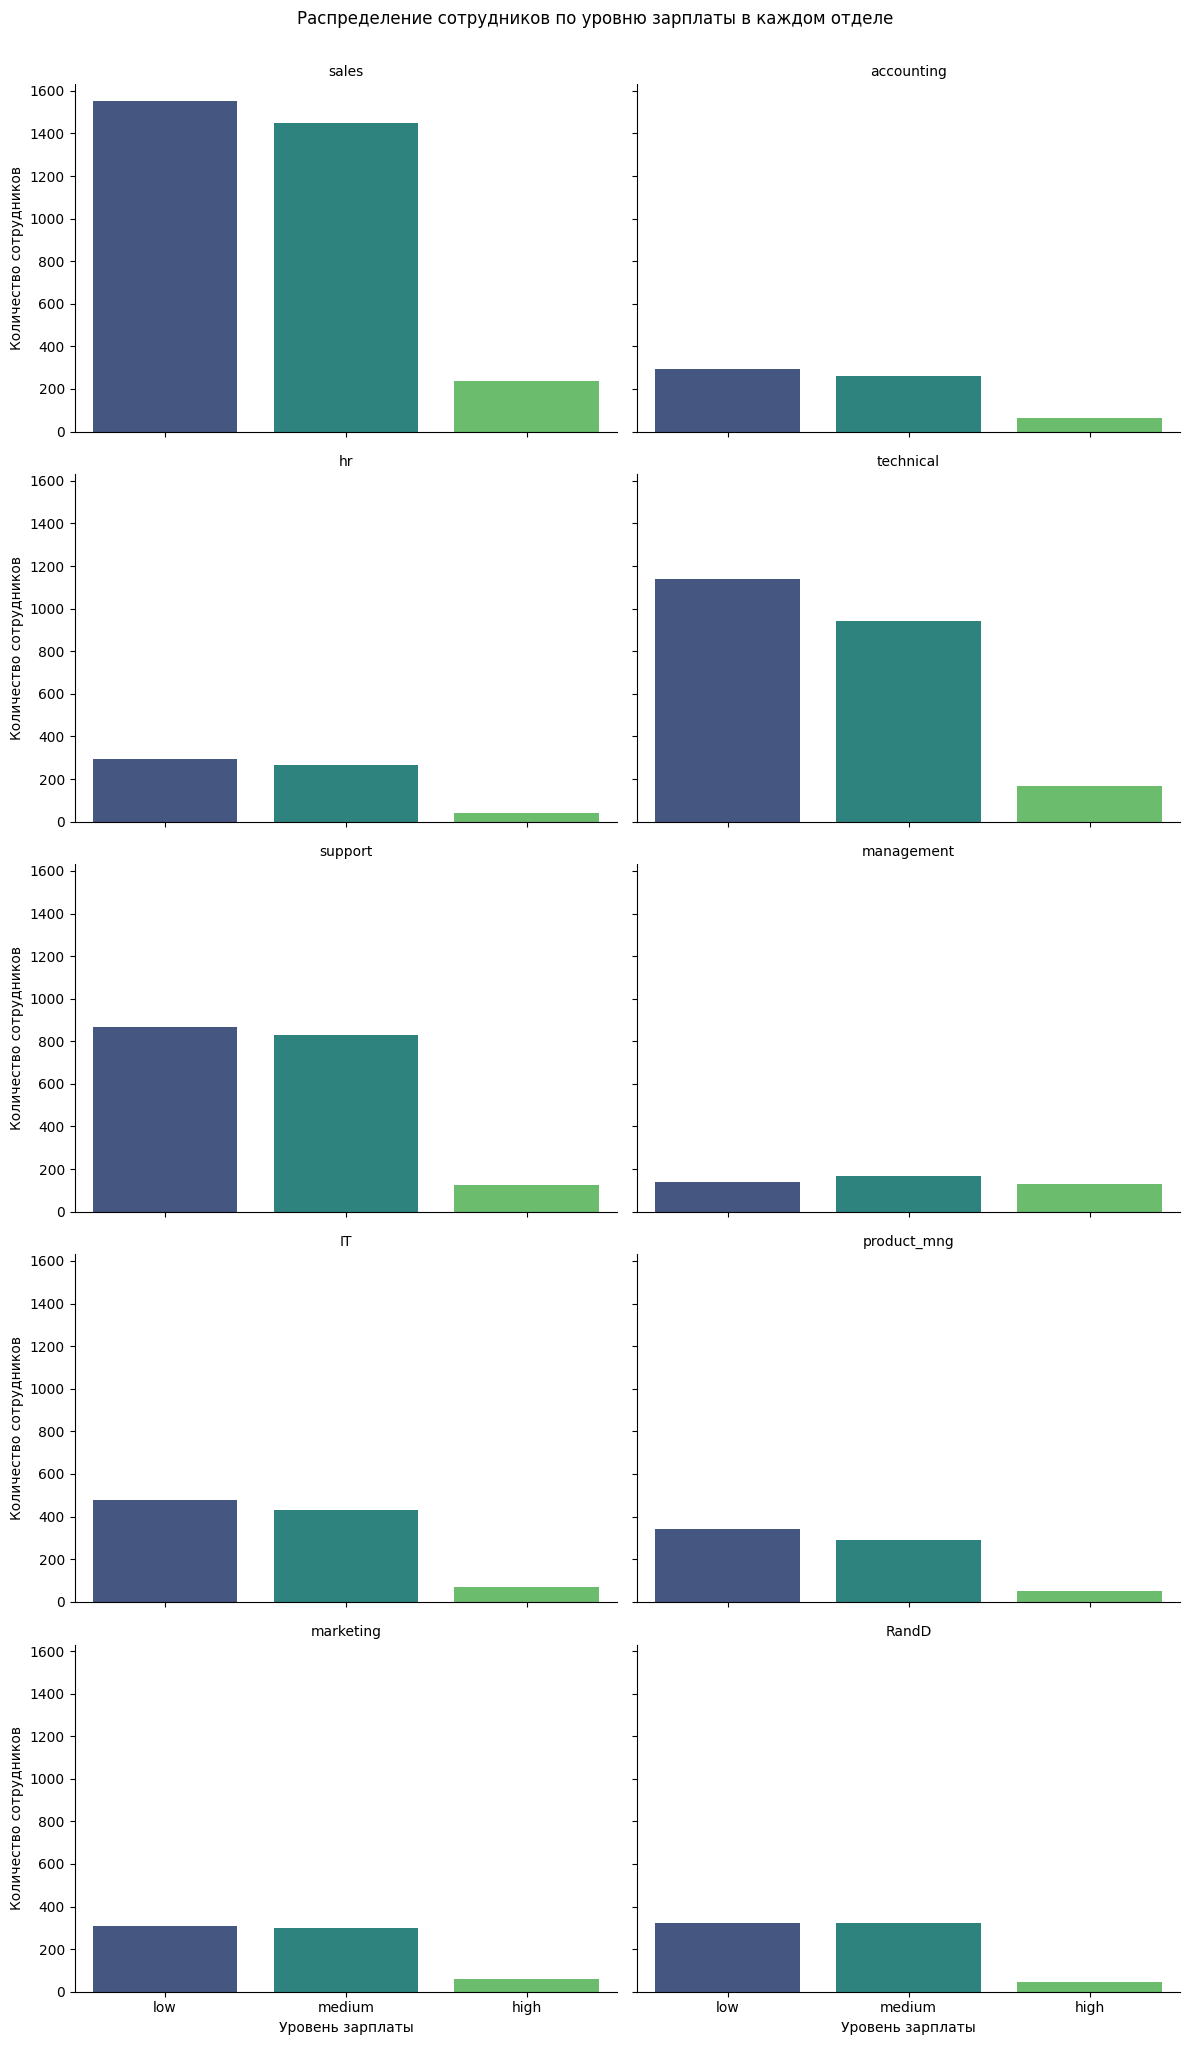

In [36]:
# Создать FacetGrid для визуализации распределения сотрудников по зарплатам в каждом департаменте
g = sns.FacetGrid(df_renamed, col="Отдел", col_wrap=2, height=4, aspect=1.5)
g.map(sns.countplot, "Зарплата", order=df_renamed['Зарплата'].value_counts().index, palette='viridis')

# Настроить заголовки и подписи осей
g.set_titles("{col_name}")
g.set_axis_labels("Уровень зарплаты", "Количество сотрудников")
g.fig.suptitle('Распределение сотрудников по уровню зарплаты в каждом отделе', y=1.02)

plt.show()

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

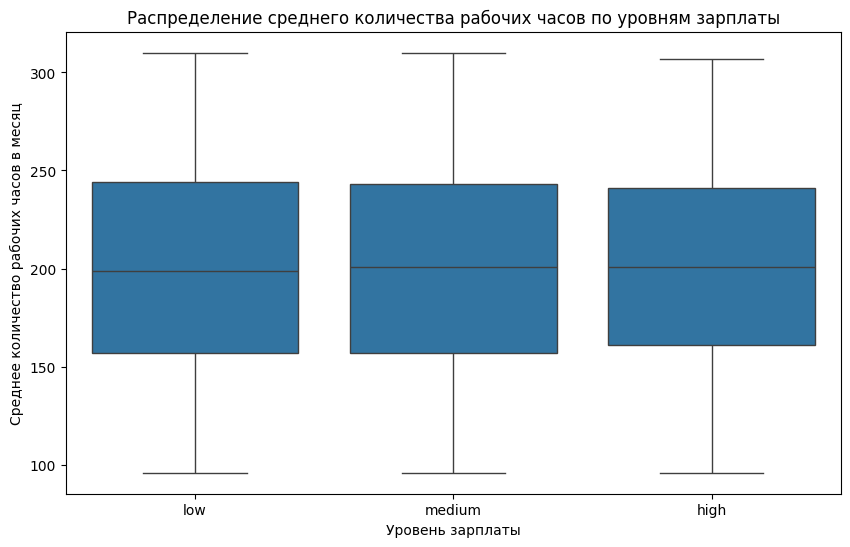

,count,mean,std,min,25%,50%,75%,max
Зарплата,,,,,,,,
high,990.0,200.067677,47.477252,96.0,161.25,201.0,241.0,307.0
low,5740.0,200.439199,49.271065,96.0,157.00,199.0,244.0,310.0
medium,5261.0,200.587341,48.371399,96.0,157.00,201.0,243.0,310.0


In [37]:
# Разделение данных на группы по уровню зарплаты
salary_groups = df_renamed.groupby('Зарплата')['Среднемесячные_часы'].describe()

# Построим коробчатую диаграмму для визуализации распределения рабочих часов по уровням зарплаты
plt.figure(figsize=(10, 6))
sns.boxplot(x='Зарплата', y='Среднемесячные_часы', data=df_renamed, order=['low', 'medium', 'high'])
plt.title('Распределение среднего количества рабочих часов по уровням зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднее количество рабочих часов в месяц')
plt.show()

# Посмотрим на основные статистические характеристики
salary_groups

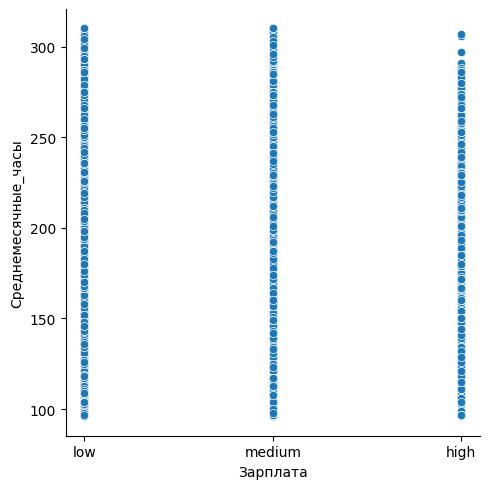

In [51]:
#посмотрим распределение по каждой из выборок
sns.relplot(data=df_renamed, x=df_renamed['Зарплата'], y=df_renamed['Среднемесячные_часы']);

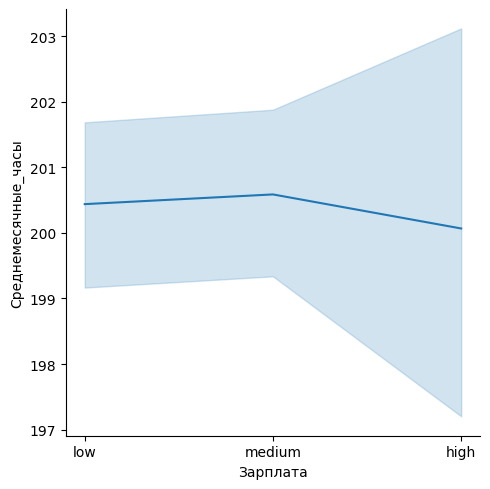

In [52]:
#Посмотрим график средних значений в выборках
sns.relplot(data=df_renamed, x=df_renamed['Зарплата'], y=df_renamed['Среднемесячные_часы'], kind = "line");

Из диаграмм и описательной статистики видно следующее:

Среднее количество рабочих часов в месяц для сотрудников с низким, средним и высоким уровнем зарплаты очень схоже: около 200 часов, медианы также мало отличаются.
Различия между группами не кажутся значительными, хотя в группе с высокими зарплатами есть некоторое снижение часов и разброс выше.

In [49]:
def check_normality(data,lab):
    #Визуализируем выборку
    sns.kdeplot(data, label=lab, fill = True, color = '#000000')
    plt.legend()
    plt.show()
    #Проверим нормальность распределения по тесту Шапиро-Уилка
    stat, p = st.shapiro(data)
    print(f'stat = {stat:.3f}, p = {p:.5f}')
    # Интерпретируем результатов
    if p<0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

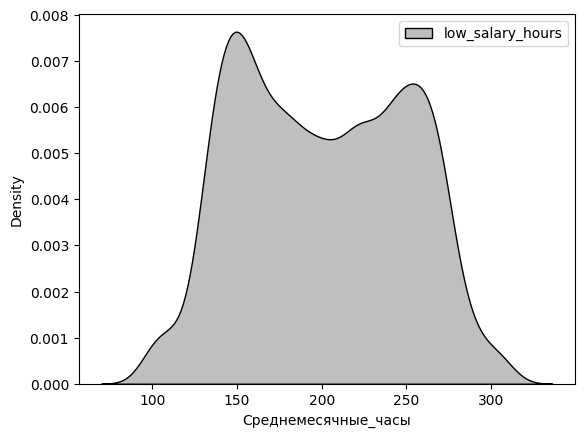

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.968, p = 0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


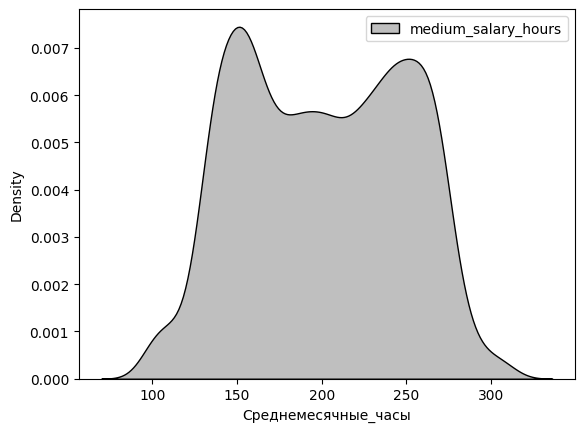

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.967, p = 0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


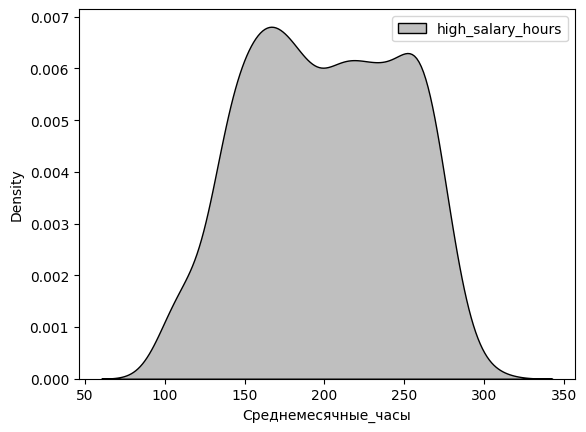

stat = 0.973, p = 0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [50]:
# Получаем данные для каждой группы
low_salary_hours = df_renamed[df_renamed['Зарплата'] == 'low']['Среднемесячные_часы']
medium_salary_hours = df_renamed[df_renamed['Зарплата'] == 'medium']['Среднемесячные_часы']
high_salary_hours = df_renamed[df_renamed['Зарплата'] == 'high']['Среднемесячные_часы']

#проверим распределения выборок на нормальность используя разработанную функцию
check_normality(low_salary_hours,'low_salary_hours')
check_normality(medium_salary_hours,"medium_salary_hours")
check_normality(high_salary_hours,"high_salary_hours")

Заключение
Распределения рабочих часов в месяц в каждой группе зарплаты не являются нормальными, что нарушает одно из предположений ANOVA. В этом случае лучше использовать непараметрические тесты, такие как тест Крускала-Уоллиса, который не требует нормальности распределений.

Проведем тест Крускала-Уоллиса для проверки гипотезы о равенстве медиан рабочих часов среди групп с различными уровнями зарплаты

In [54]:
from scipy.stats import kruskal

# Формулировка гипотез
# H0: Медианы рабочих часов в месяц одинаковы для всех уровней зарплаты
# H1: Медианы рабочих часов в месяц различаются хотя бы для одной пары уровней зарплаты

# Проведем тест Крускала-Уоллиса для проверки гипотезы о равенстве медиан рабочих часов среди групп зарплаты
kruskal_result = kruskal(low_salary_hours, medium_salary_hours, high_salary_hours)
print(f"p-value: {round(kruskal_result.pvalue,3)}")

# Проверка гипотезы
if kruskal_result.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: Медианы рабочих часов в месяц различаются для разных уровней зарплаты")
else:
    print("Не можем отвергнуть нулевую гипотезу: Медианы рабочих часов в месяц не различаются для разных уровней зарплаты")


p-value: 0.96
Не можем отвергнуть нулевую гипотезу: Медианы рабочих часов в месяц не различаются для разных уровней зарплаты


Заключение:
Медианы рабочих часов в месяц не различаются статистически значимо для сотрудников с различными уровнями зарплаты.

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов


In [63]:
df_renamed.select_dtypes(include=['float64', 'int64']).groupby('Уволился').mean().round(2)

,Уровень_удовлетворенности,Последняя_оценка,Количество_проектов,Среднемесячные_часы,Стаж_работы,Несчастные_случаи,Повышение_за_5_лет
Уволился,,,,,,,
0,0.67,0.72,3.79,198.94,3.26,0.17,0.02
1,0.44,0.72,3.88,208.16,3.88,0.05,0.00


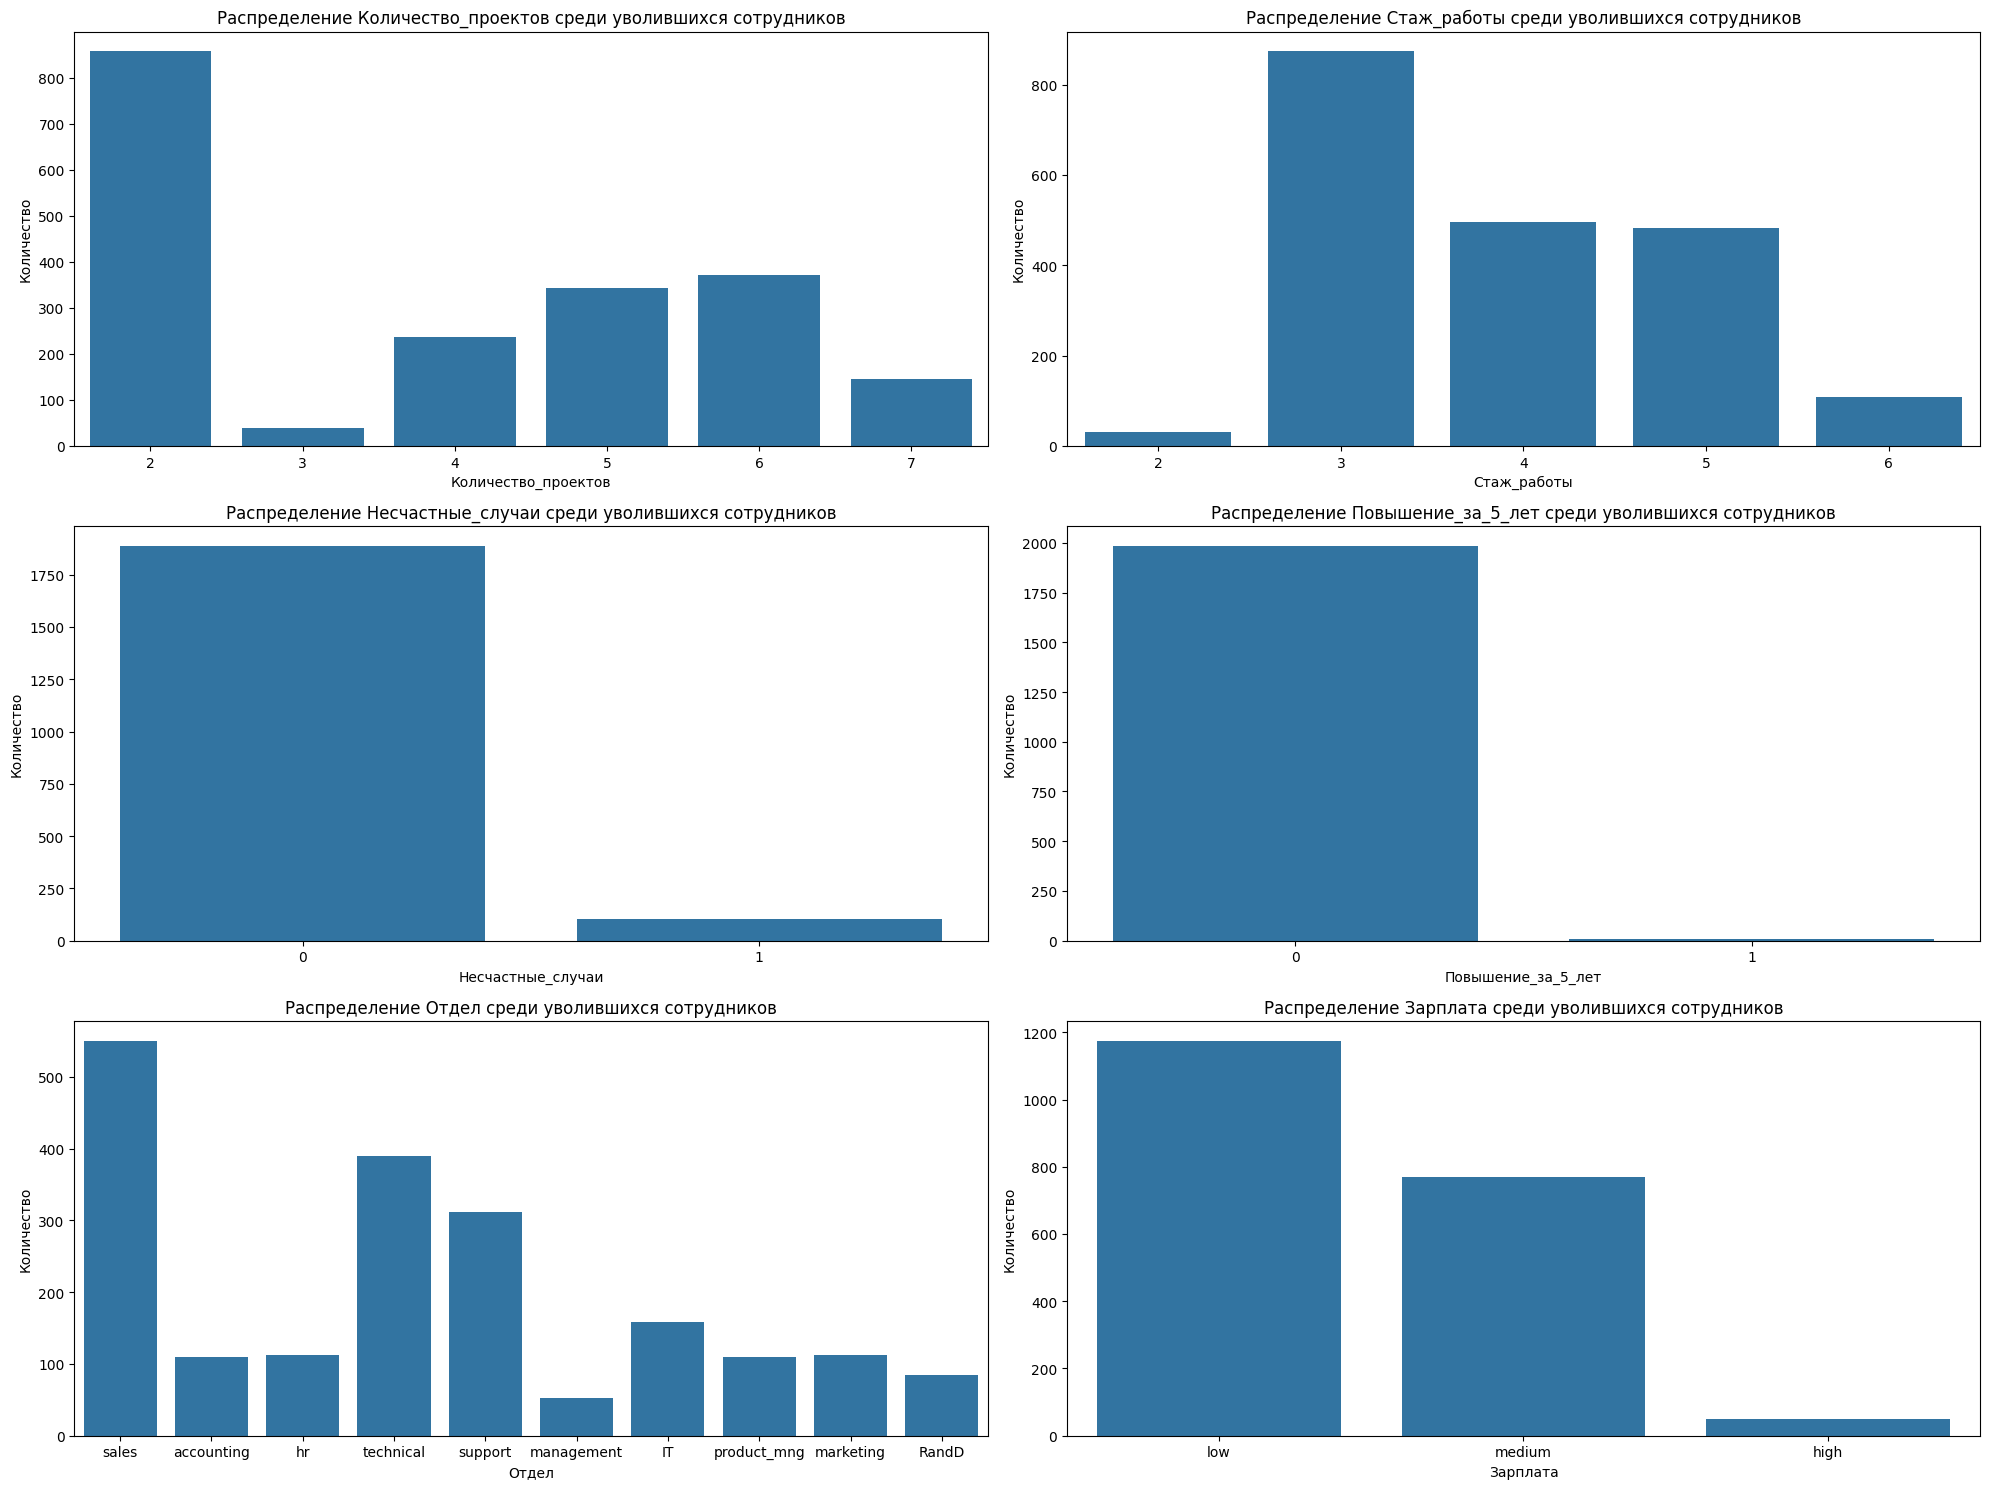

In [66]:
# Разделение данных на категориальные и числовые признаки
#Уровень_удовлетворенности	Последняя_оценка	Количество_проектов	Среднемесячные_часы	Стаж_работы	Несчастные_случаи	Уволился	Повышение_за_5_лет	Отдел
categorical_features = ['Количество_проектов', 'Стаж_работы', 'Несчастные_случаи',
                        'Повышение_за_5_лет', 'Отдел', 'Зарплата']

# Фильтрация данных для сотрудников, которые уволились (Уволился = 1)
data_left = df_renamed[df_renamed['Уволился'] == 1]

# Устанавливаем размер графиков
plt.figure(figsize=(20, 15))

# Построение столбчатых диаграмм для категориальных признаков по признаку уволившихся
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data_left, x=feature)
    plt.title(f'Распределение {feature} среди уволившихся сотрудников')
    plt.xlabel(feature)
    plt.ylabel('Количество')

plt.tight_layout()
plt.show()

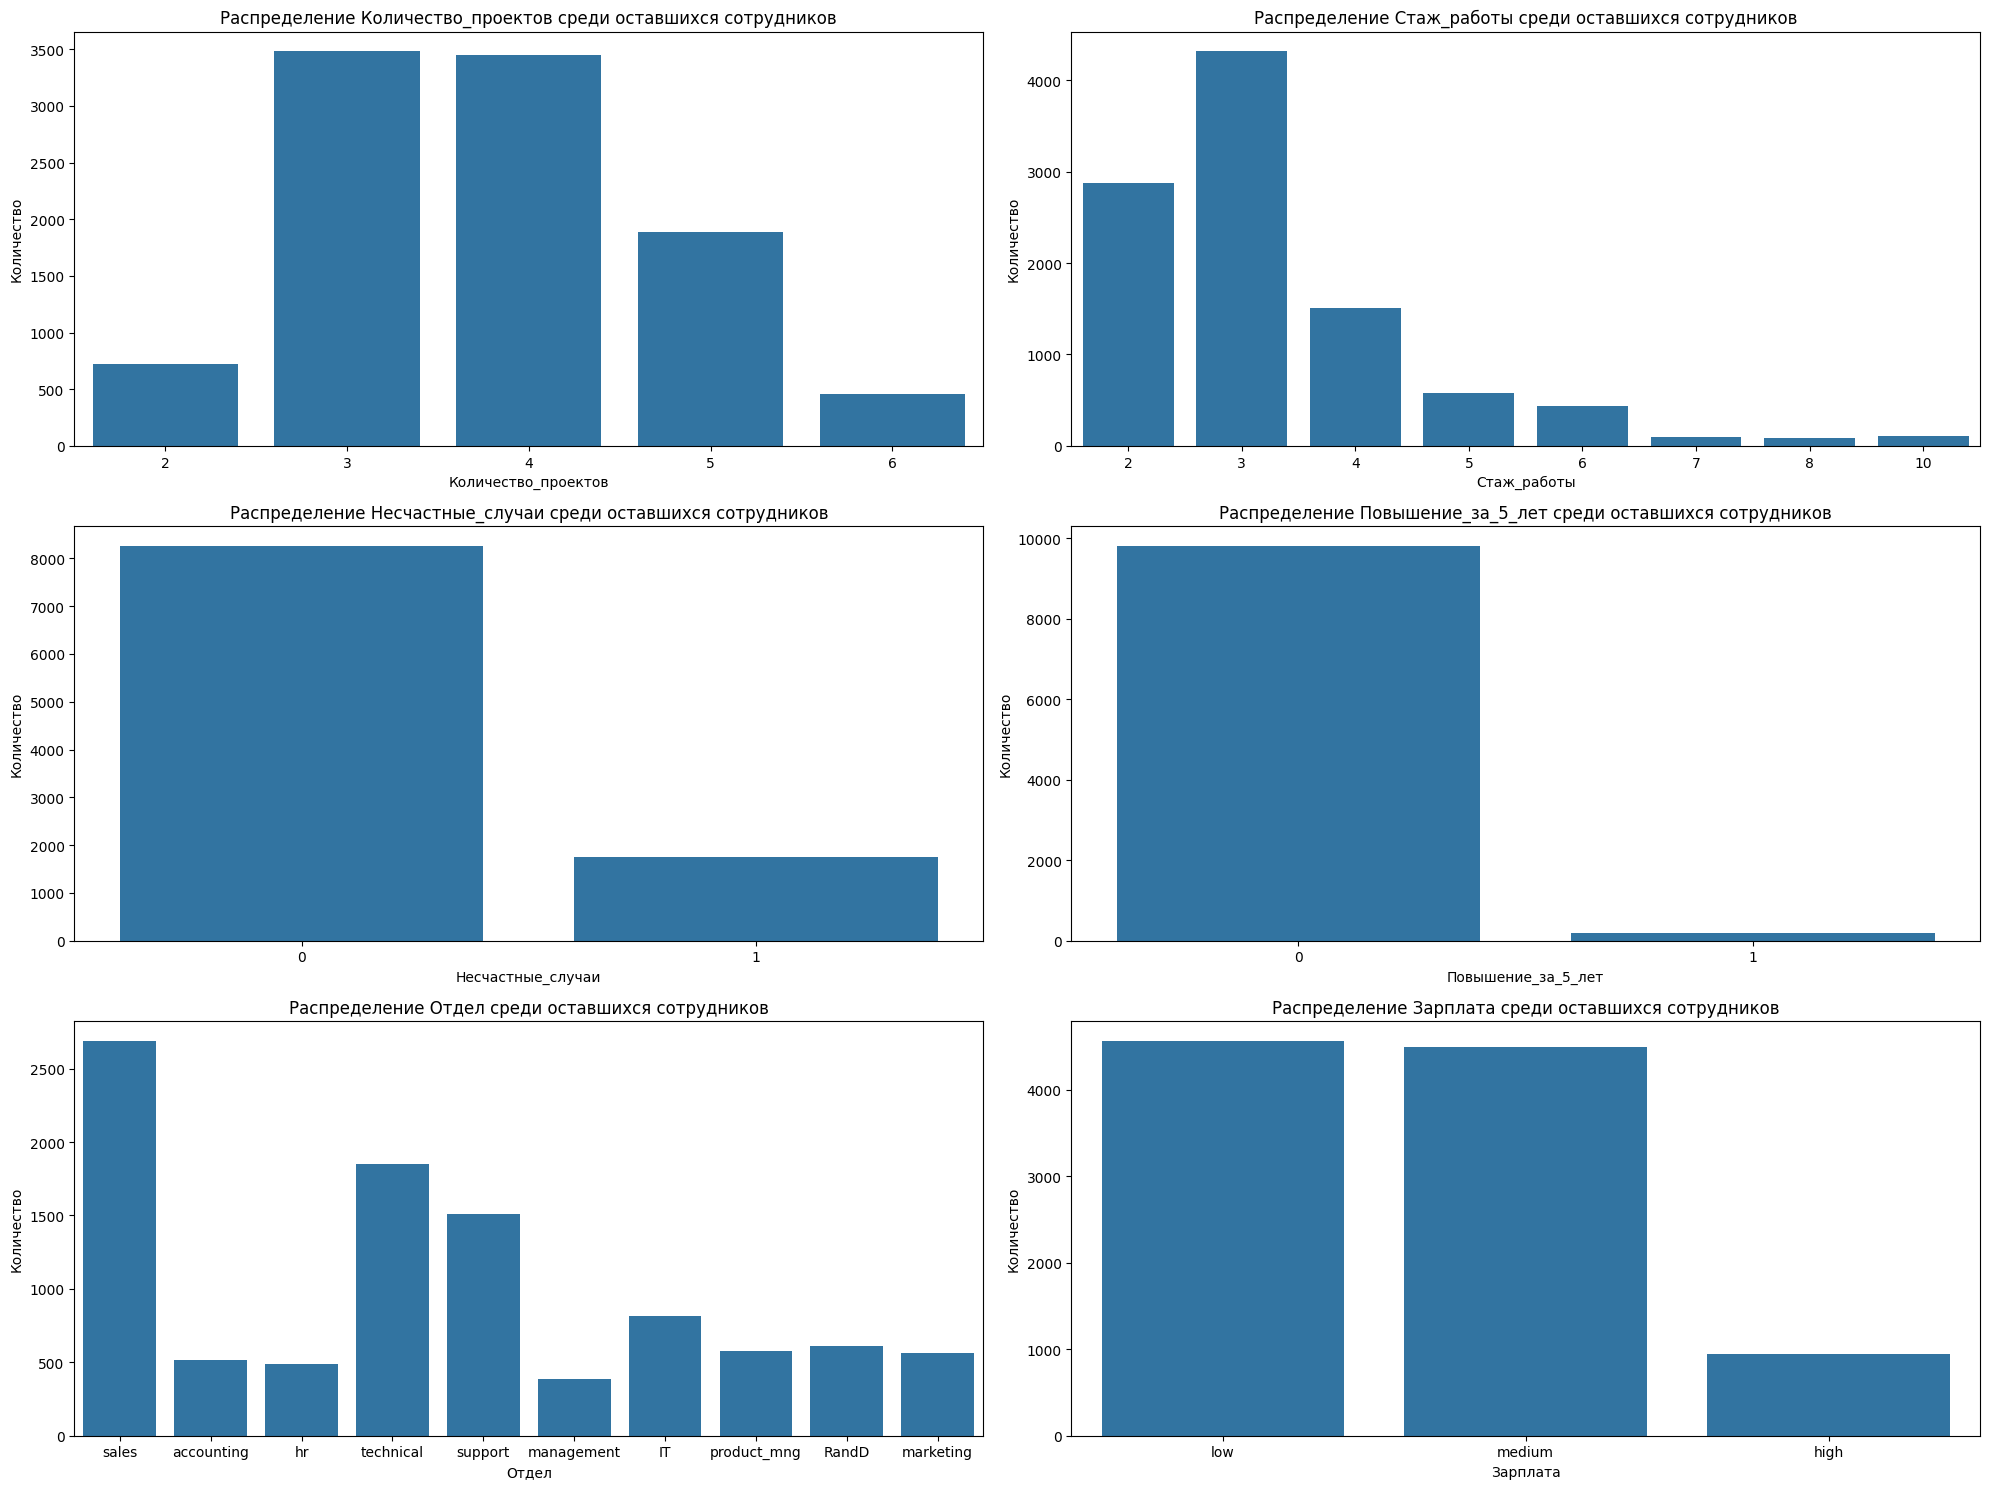

In [75]:
# Разделение данных на категориальные и числовые признаки
#Уровень_удовлетворенности	Последняя_оценка	Количество_проектов	Среднемесячные_часы	Стаж_работы	Несчастные_случаи	Уволился	Повышение_за_5_лет	Отдел
categorical_features = ['Количество_проектов', 'Стаж_работы', 'Несчастные_случаи',
                        'Повышение_за_5_лет', 'Отдел', 'Зарплата']

# Фильтрация данных для сотрудников, которые остались (Уволился = 0)
data_left = df_renamed[df_renamed['Уволился'] == 0]

# Устанавливаем размер графиков
plt.figure(figsize=(20, 15))

# Построение столбчатых диаграмм для категориальных признаков по признаку уволившихся
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data_left, x=feature)
    plt.title(f'Распределение {feature} среди оставшихся сотрудников')
    plt.xlabel(feature)
    plt.ylabel('Количество')

plt.tight_layout()
plt.show()

Выводы:

Количество проектов:

Большинство уволившихся сотрудников выполнили 2, 6 или 7 проектов. Напротив большинство оставшихся сотрудников выполнили 3-5 проектов.

Стаж работы в годах:

Наибольшее количество уволившихся сотрудников имеют стаж работы 3, 4 и 5 лет. Напротив большинство оставшихся до 3-х лет.

Несчастные случаи:

Большинство уволившихся сотрудников, как и оставшихся не имели несчастных случаев. Хотя у оставшихся несчятных случае наблюдается больше.

Повышение за последние 5 лет:

Практически все уволившиеся, так и оставшиеся сотрудники не получали повышение за последние 5 лет.

Отдел:

Уволившиеся и оставшиеся сотрудники распределены по различным отделам, с наибольшим количеством из отделов продаж и технического отдела.

Зарплата:

Наибольшее количество уволившихся сотрудников имеют низкую зарплату. У оставшихся наблуюдается распределение в строну повышенной зарплаты.

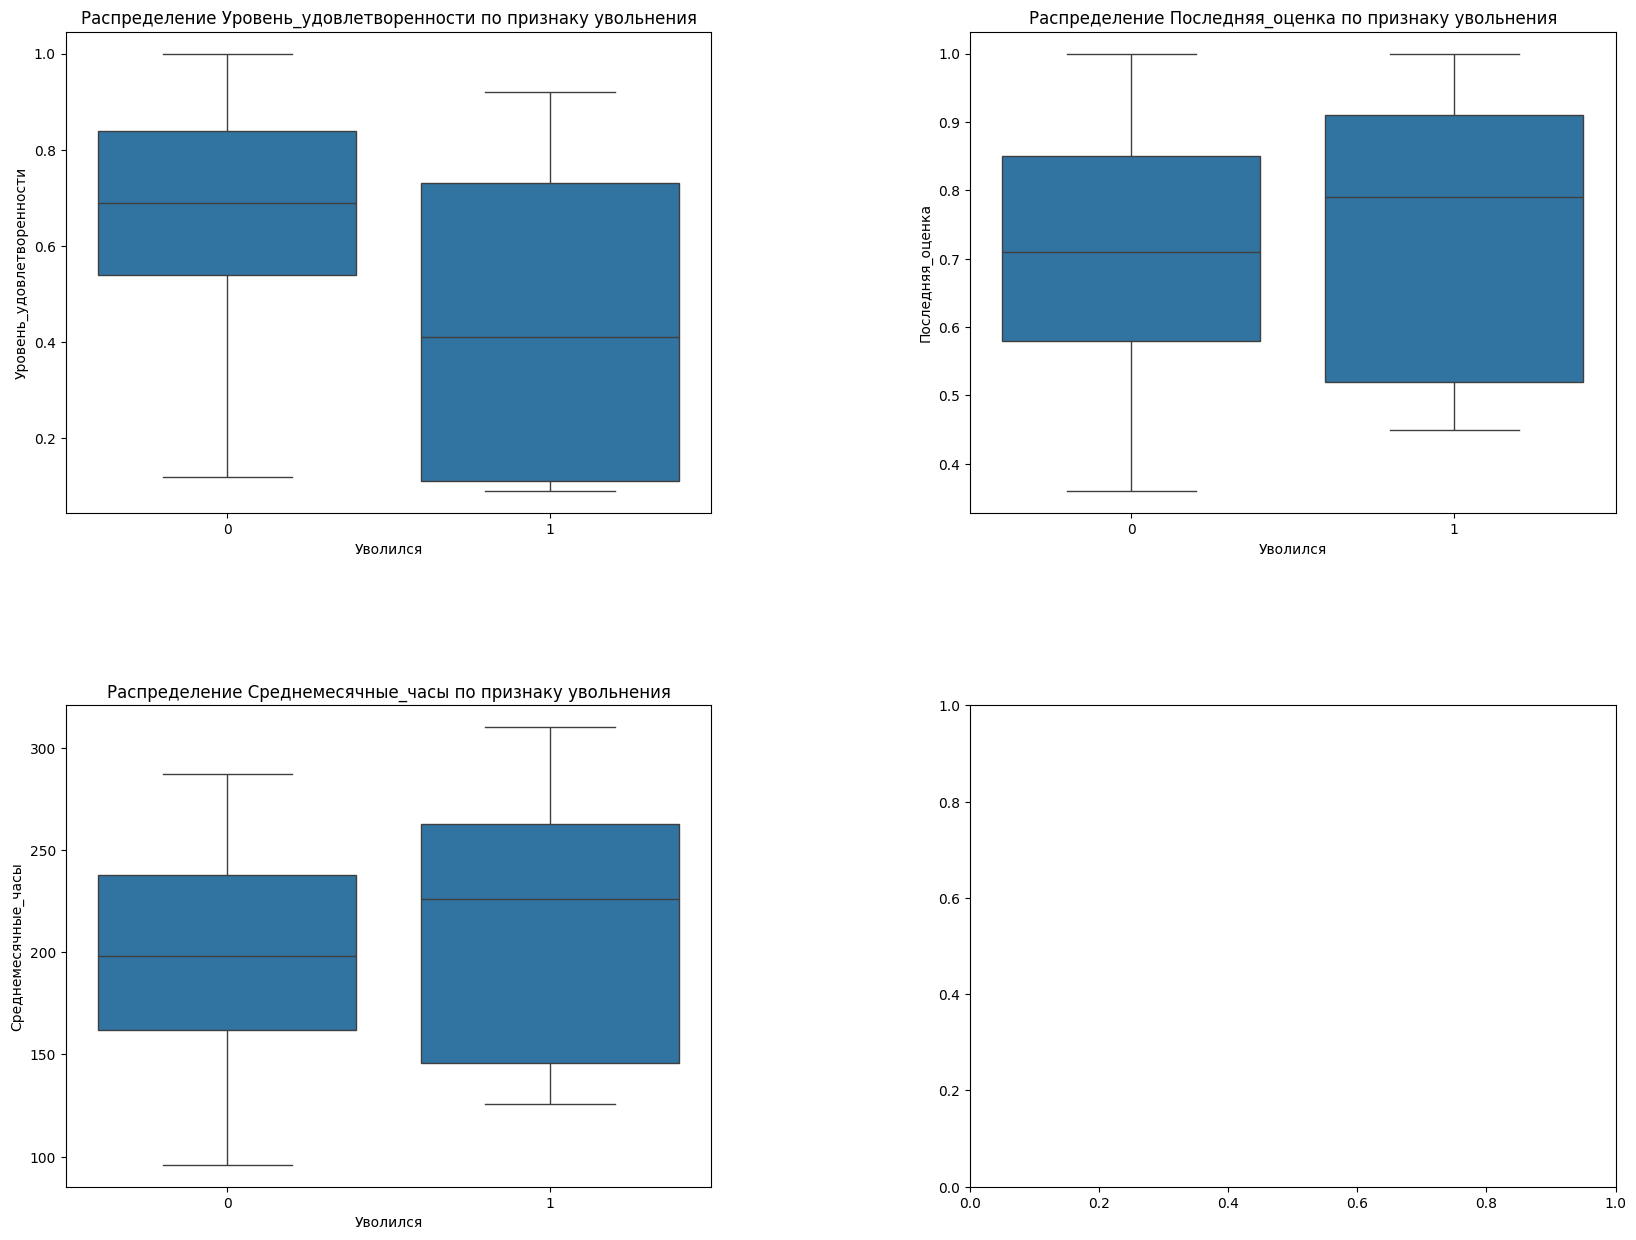

In [76]:
# Устанавливаем размер графиков
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Построение ящиков с усами для числовых признаков среди уволившихся и оставшихся сотрудников
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 2)
    sns.boxplot(data=df_renamed, x='Уволился', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение {feature} по признаку увольнения')
    axes[row, col].set_xlabel('Уволился')
    axes[row, col].set_ylabel(feature)

plt.show()

Выводы:

Уровень удовлетворенности:

У сотрудников, которые остались, уровень удовлетворенности выше, чем у тех, кто уволился. Уволившиеся сотрудники имеют уровень удовлетворенности ниже среднего.

Последняя оценка:

Оценки уволившихся сотрудников и тех, кто остался, распределены примерно одинаково, с незначительными различиями.

Средние часы в месяц:

Сотрудники, которые уволились, в среднем работают больше часов в месяц, чем те, кто остался.

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [78]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_renamed.drop(['Уволился', 'Отдел','Зарплата'], axis = 1)
y = df_renamed['Уволился']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [80]:
from sklearn.preprocessing import StandardScaler
# Стандартизация данных
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
# Обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2500
           1       0.50      0.25      0.33       498

    accuracy                           0.83      2998
   macro avg       0.68      0.60      0.62      2998
weighted avg       0.80      0.83      0.81      2998



Text(50.722222222222214, 0.5, 'Факт')

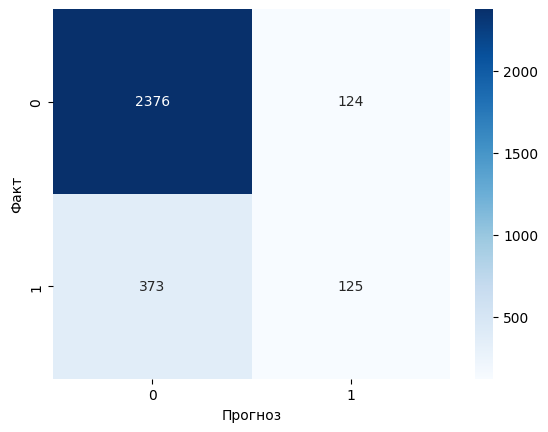

In [84]:
from sklearn.metrics import confusion_matrix

#Визуализируем матрицу ошибок для оценки модели
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

Модель досточно точно предсказывает сотрудников, которые останутся

10. Загрузить jupyter notebook с решение на github и прислать ссылку